<em><strong><h5>EXERCISE 3 NATURAL LANGUAGE PROCESSING</h5></strong></em>

<strong>1. *EXPLORING WORD EMBEDDINGS*</strong>

In [2]:
import gensim.downloader as api
import json
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
glove_vectors = api.load("glove-wiki-gigaword-100")

In [4]:
set_words = ['computer', 'laptop', 'queen', 'king']
top5_similar_words = []
for word in set_words:
    top5_similar_words.append(glove_vectors.most_similar(word, topn=5))
print(top5_similar_words)

[[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175)], [('laptops', 0.8518659472465515), ('computers', 0.7559927105903625), ('phones', 0.7229112386703491), ('portable', 0.7157840728759766), ('desktop', 0.7085692286491394)], [('princess', 0.7947244644165039), ('king', 0.7507690191268921), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026164054871), ('lady', 0.7044796943664551)], [('prince', 0.7682329416275024), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175)]]


In [5]:
vec1 = glove_vectors.get_vector('king') - glove_vectors.get_vector('man') + glove_vectors.get_vector('woman')
vec2 = glove_vectors.get_vector('vehicle') - glove_vectors.get_vector('computer') + glove_vectors.get_vector('laptop')

print(glove_vectors.most_similar_cosmul(vec1))
print(glove_vectors.most_similar_cosmul(vec2))

[('king', 3.217428207397461), ('queen', 2.989459991455078), ('monarch', 2.703282356262207), ('throne', 2.671286106109619), ('daughter', 2.6636509895324707), ('prince', 2.6331653594970703), ('princess', 2.6112213134765625), ('mother', 2.5906436443328857), ('elizabeth', 2.5855517387390137), ('father', 2.531252384185791)]
[('vehicle', 3.230125904083252), ('suv', 3.1377596855163574), ('minivan', 3.090654134750366), ('parked', 3.0664918422698975), ('jeep', 3.013291835784912), ('car', 2.9701180458068848), ('vehicles', 2.883117914199829), ('humvee', 2.858644485473633), ('pickup', 2.8569092750549316), ('truck', 2.843186378479004)]


<strong>2. *INVESTIGATING SOCIETAL BIASES*</strong>

In [6]:
professions = ['engineer', 'nurse', 'scientist']
names = ['james', 'emily', 'mohammed', 'ling', 'juan']
similarities = {}

for profession in professions:
    similarities[profession] = []
    for name in names:
        similarities[profession].append([name, float(glove_vectors.similarity(profession, name))])

json_dict = json.dumps(similarities, indent=3)
print(json_dict)

{
   "engineer": [
      [
         "james",
         0.43955788016319275
      ],
      [
         "emily",
         0.15777018666267395
      ],
      [
         "mohammed",
         0.258592814207077
      ],
      [
         "ling",
         0.11636736989021301
      ],
      [
         "juan",
         0.27362167835235596
      ]
   ],
   "nurse": [
      [
         "james",
         0.23846927285194397
      ],
      [
         "emily",
         0.36251455545425415
      ],
      [
         "mohammed",
         0.1562427282333374
      ],
      [
         "ling",
         0.20062392950057983
      ],
      [
         "juan",
         0.16719740629196167
      ]
   ],
   "scientist": [
      [
         "james",
         0.4182989299297333
      ],
      [
         "emily",
         0.23490199446678162
      ],
      [
         "mohammed",
         0.28646785020828247
      ],
      [
         "ling",
         0.2678428888320923
      ],
      [
         "juan",
         0.18118484

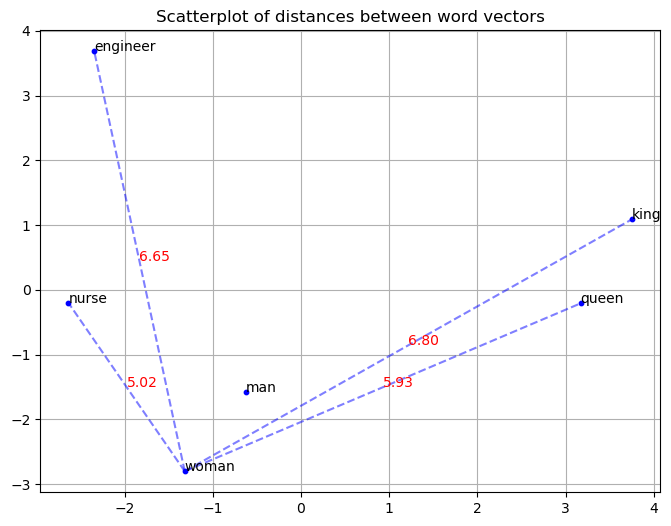

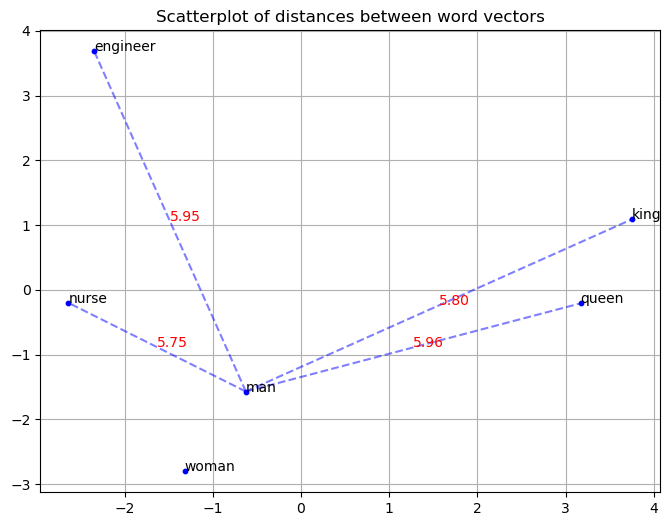

In [24]:
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = np.array([glove_vectors[word] for word in words])

pca_model = PCA(n_components=2, random_state=42)
word_vectors_2d = pca_model.fit_transform(word_vectors)

professions = ["nurse", "engineer"]
non_professions = ["king", "queen", "woman"]


plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='b', s=10)

#annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

woman_index = words.index("woman")
for word in words:
    if word != "woman" and word != "man":
        word_index = words.index(word)
        plt.plot([word_vectors_2d[woman_index, 0], word_vectors_2d[word_index, 0]], 
                 [word_vectors_2d[woman_index, 1], word_vectors_2d[word_index, 1]], 
                 color='blue', linestyle='--', alpha=0.5)
        
        distance = np.linalg.norm(word_vectors[woman_index] - word_vectors[word_index])
        
        # Annotate the line with the distance
        plt.annotate(f'{distance:.2f}', 
                     ((word_vectors_2d[woman_index, 0] + word_vectors_2d[word_index, 0]) / 2,
                      (word_vectors_2d[woman_index, 1] + word_vectors_2d[word_index, 1]) / 2),
                     color='red', fontsize=10, )

plt.title('Scatterplot of distances between woman and other word vectors')
plt.grid(True)
plt.show()

#lets do the same but for man

professions = ["nurse", "engineer"]
non_professions = ["king", "queen", "man"]

plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='b', s=10)

#annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

man_index = words.index("man")
for word in words:
    if word != "woman" and word != "man":
        word_index = words.index(word)
        plt.plot([word_vectors_2d[man_index, 0], word_vectors_2d[word_index, 0]], 
                 [word_vectors_2d[man_index, 1], word_vectors_2d[word_index, 1]], 
                 color='blue', linestyle='--', alpha=0.5)
        
        distance = np.linalg.norm(word_vectors[man_index] - word_vectors[word_index])
        
        # Annotate the line with the distance
        plt.annotate(f'{distance:.2f}', 
                     ((word_vectors_2d[man_index, 0] + word_vectors_2d[word_index, 0]) / 2,
                      (word_vectors_2d[man_index, 1] + word_vectors_2d[word_index, 1]) / 2),
                     color='red', fontsize=10, )

plt.title('Scatterplot of distances between man and other word vectors')
plt.grid(True)
plt.show()

the scatterplot is the one in LP2, check it out.